In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
disney_data = pd.read_csv('D:\\jupyter notebook\\disney_plus_titles.csv')

In [3]:
sns.set_style("whitegrid")

In [4]:
genre_count = disney_data['listed_in'].str.split(', ').explode().value_counts()

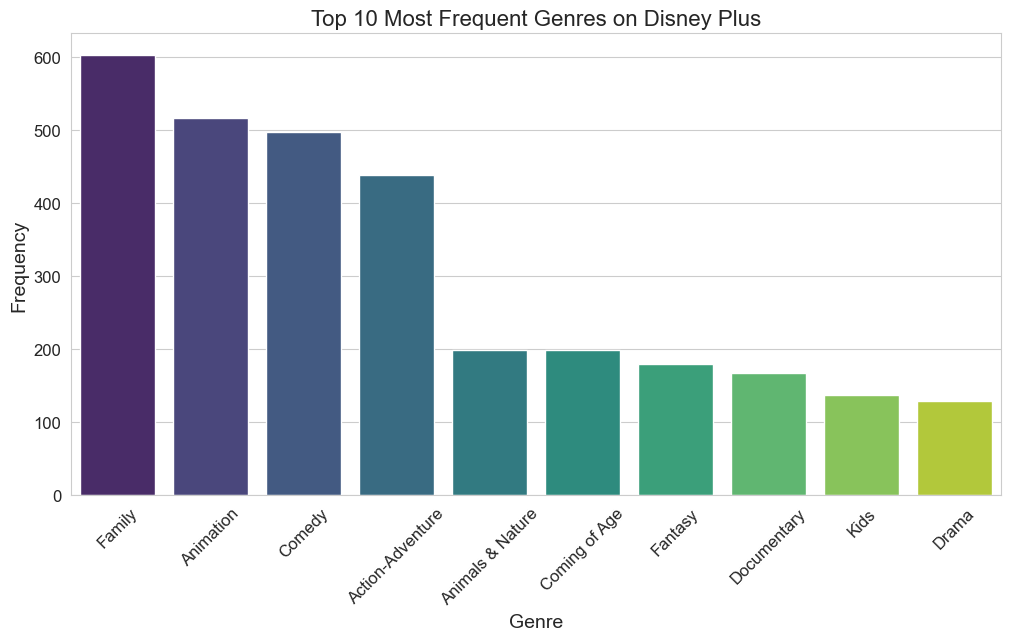

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.head(10).index, y=genre_count.head(10).values, hue=genre_count.head(10).index, palette="viridis", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Most Frequent Genres on Disney Plus', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

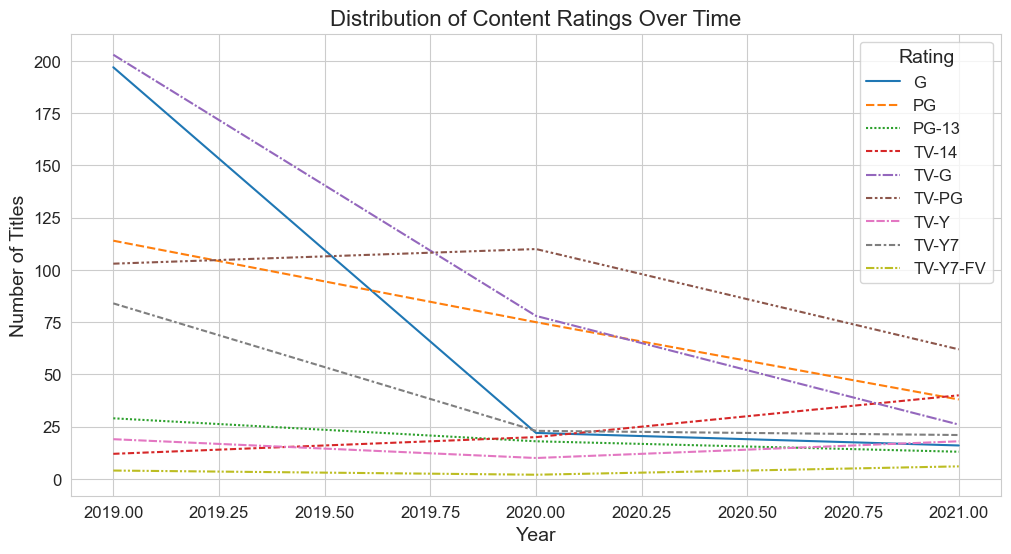

In [6]:
disney_data['date_added'] = pd.to_datetime(disney_data['date_added'])
rating_trend = disney_data.groupby([disney_data['date_added'].dt.year, 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_trend)
plt.title('Distribution of Content Ratings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rating', fontsize=12, title_fontsize=14)
plt.show()

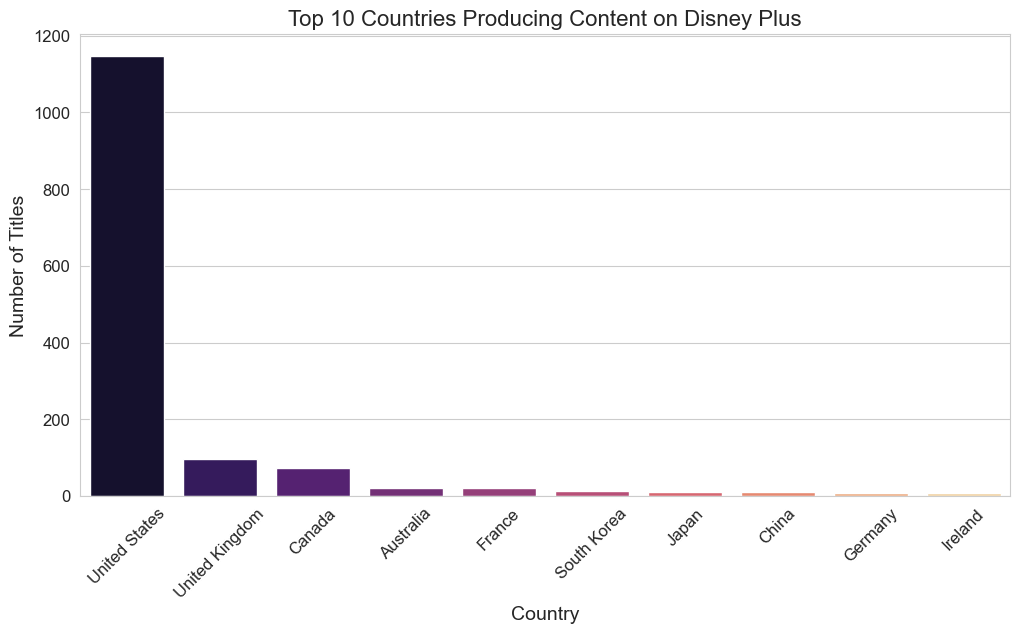

In [7]:
country_genre_count = disney_data['country'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_genre_count.head(10).index, y=country_genre_count.head(10).values, hue=country_genre_count.head(10).index, palette="magma", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Countries Producing Content on Disney Plus', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

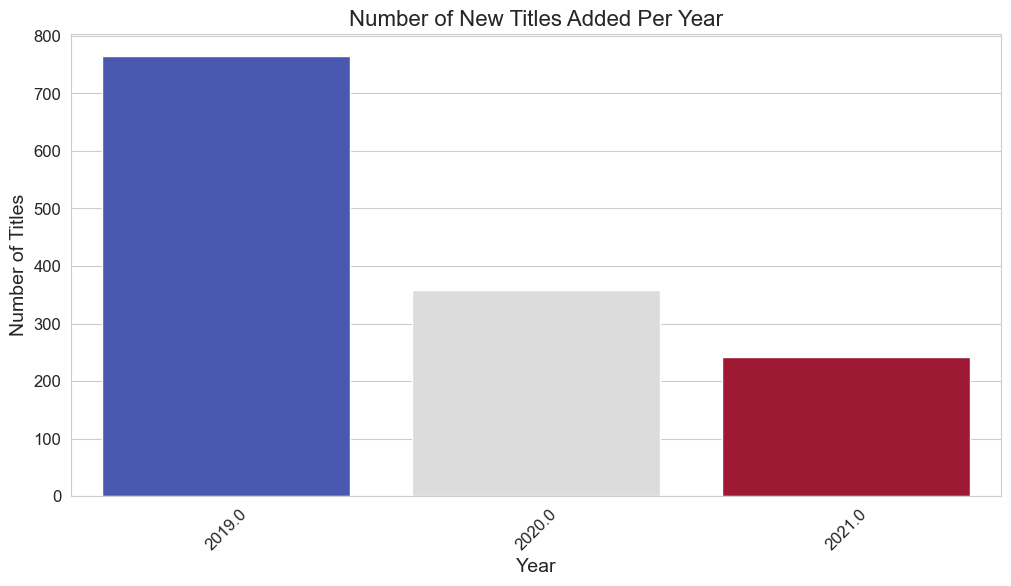

In [8]:
titles_per_year = disney_data['date_added'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=titles_per_year.index, y=titles_per_year.values, hue=titles_per_year.index, palette="coolwarm", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Number of New Titles Added Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


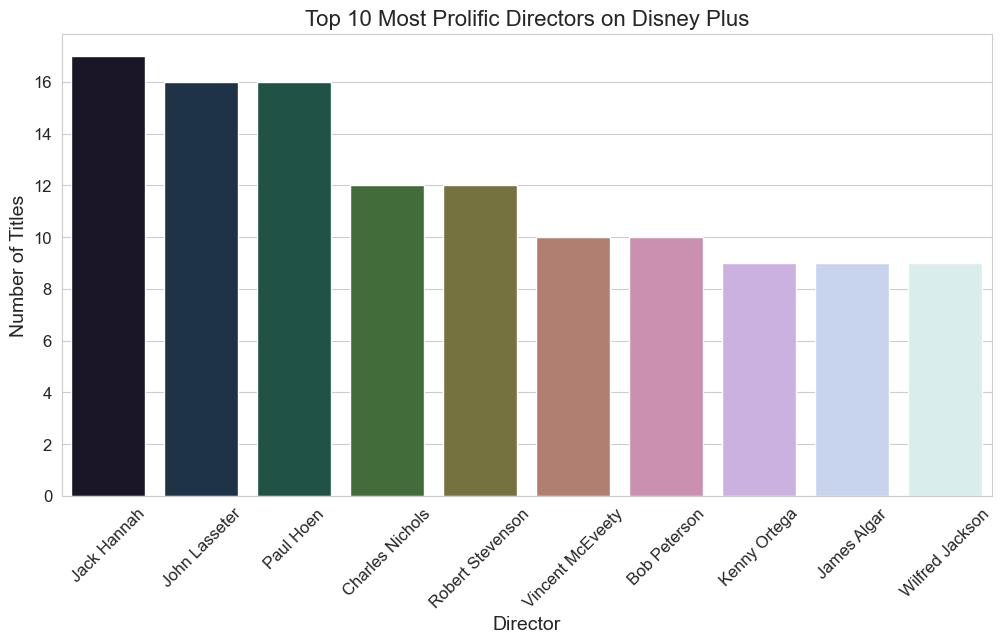

In [9]:
director_count = disney_data['director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=director_count.index, y=director_count.values, hue=director_count.index, palette="cubehelix", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Most Prolific Directors on Disney Plus', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Directors and Their Associated Genres:
 director
Aaron Blaise, Robert Walker                         Action-Adventure, Animation, Family
Adam Shankman                         Action-Adventure, Comedy, Spy/Espionage, Comed...
Adam Stein, Zach Lipovsky                       Action-Adventure, Comedy, Coming of Age
Alan Barillaro                                      Animals & Nature, Animation, Family
Alan Shapiro                                                       Crime, Drama, Family
Alan Taylor                                  Action-Adventure, Fantasy, Science Fiction
Alastair Fothergill, Andy Byatt                   Animals & Nature, Documentary, Family
Alastair Fothergill, Jeff Wilson                  Animals & Nature, Documentary, Family
Alastair Fothergill, Keith Scholey                Animals & Nature, Documentary, Family
Alastair Fothergill, Mark Linfield                Animals & Nature, Documentary, Family
Name: listed_in, dtype: object


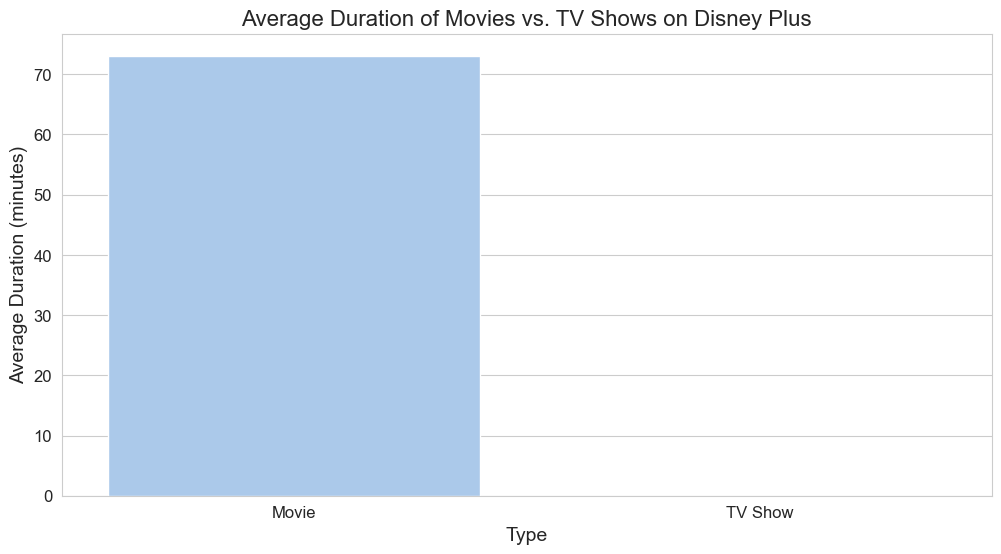

In [10]:
director_genre = disney_data.explode('listed_in').groupby('director')['listed_in'].apply(lambda x: ', '.join(x.unique()))
print("Directors and Their Associated Genres:\n", director_genre.head(10))

# 6. Average duration of movies vs. TV shows
disney_data['duration_minutes'] = disney_data['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
average_duration = disney_data.groupby('type')['duration_minutes'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_duration.index, y=average_duration.values, hue=average_duration.index, palette="pastel", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Duration of Movies vs. TV Shows on Disney Plus', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


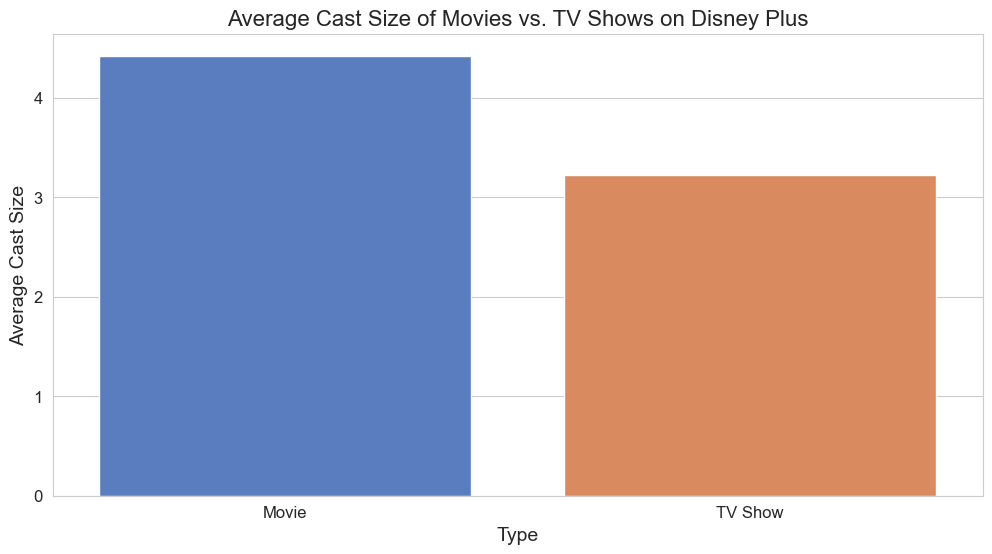

In [11]:
disney_data['cast_size'] = disney_data['cast'].apply(lambda x: len(x.split(', ')) if pd.notnull(x) else 0)
cast_size_distribution = disney_data.groupby('type')['cast_size'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=cast_size_distribution.index, y=cast_size_distribution.values, hue=cast_size_distribution.index, palette="muted", dodge=False)
plt.legend([],[], frameon=False)
plt.title('Average Cast Size of Movies vs. TV Shows on Disney Plus', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Average Cast Size', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

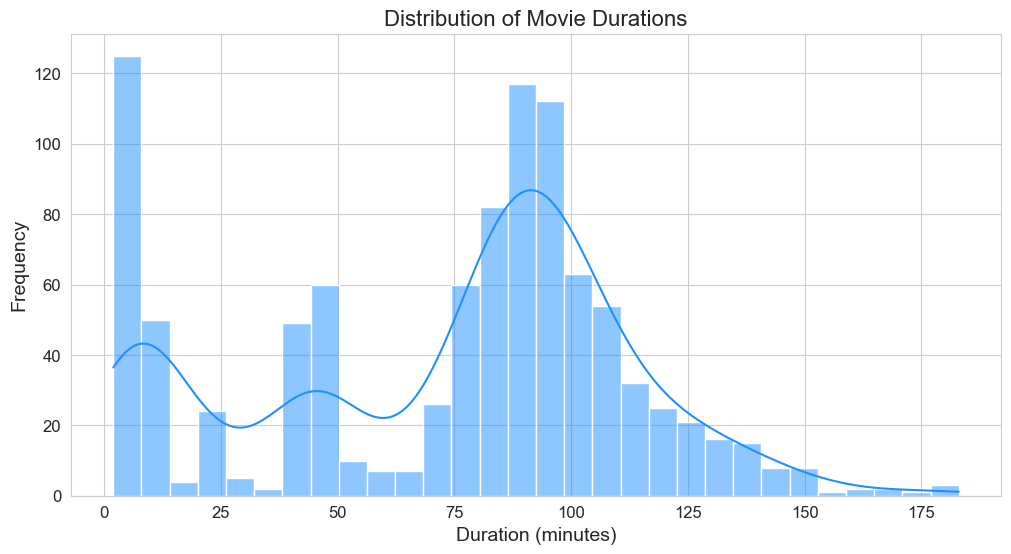

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(disney_data[disney_data['type'] == 'Movie']['duration_minutes'].dropna(), bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

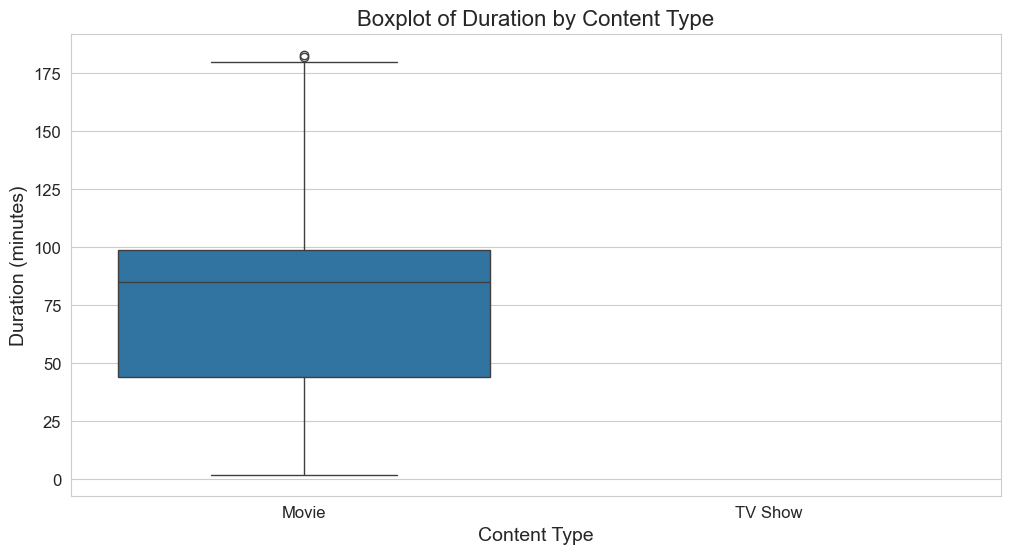

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='duration_minutes', data=disney_data)
plt.title('Boxplot of Duration by Content Type', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Duration (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


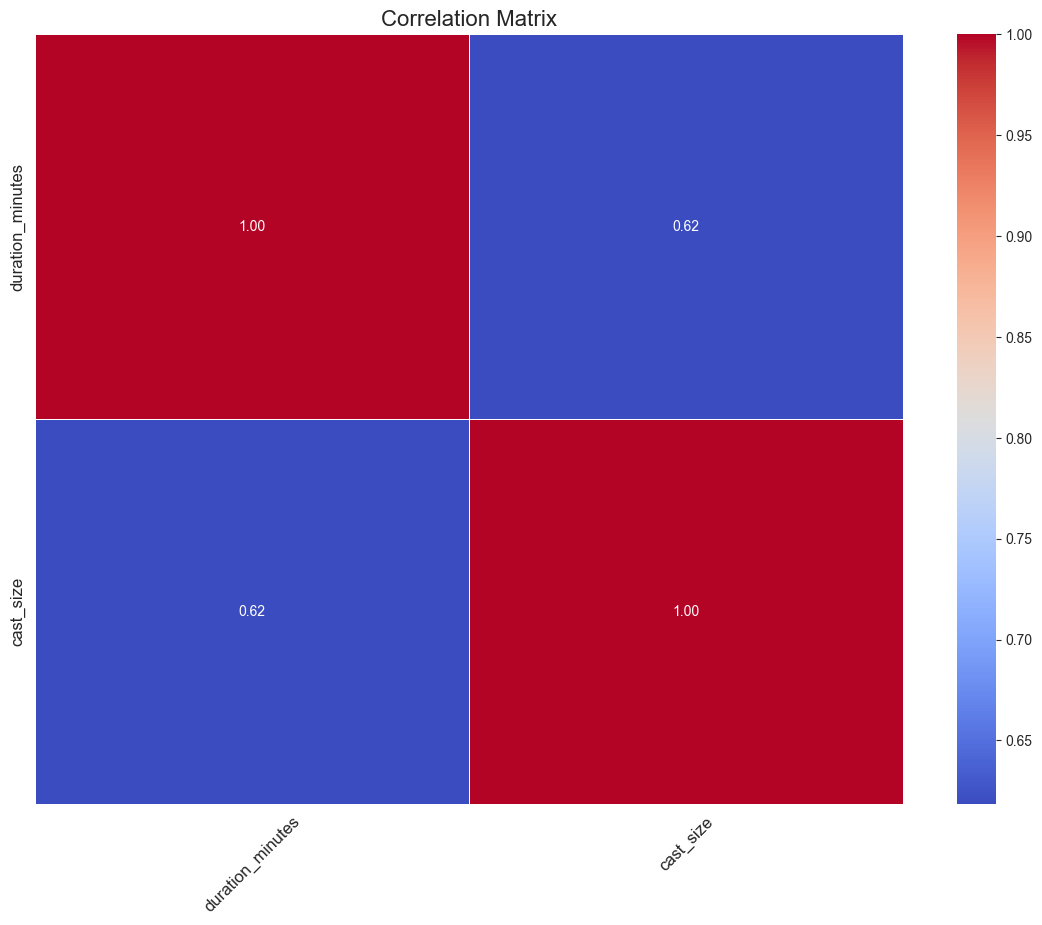

In [14]:
plt.figure(figsize=(14, 10))
corr_matrix = disney_data[['duration_minutes', 'cast_size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()